## Titanic Survivor Prediction

**Imports**

import all liblraies 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
Traning_data = pd.read_csv('titanic/train.csv')
Testing_data = pd.read_csv('titanic/test.csv')
gender_submission = pd.read_csv('titanic/gender_submission.csv')

In [3]:
Traning_data.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C


In [4]:
Traning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Traning_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
Traning_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
Traning_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
Traning_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
Testing_data.sample(n=10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
398,1290,3,"Larsson-Rondberg, Mr. Edvard A",male,22.0,0,0,347065,7.7750,NaN,S
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
110,1002,2,"Stanton, Mr. Samuel Ward",male,41.0,0,0,237734,15.0458,NaN,C
87,979,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.0500,NaN,S
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
359,1251,3,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S
283,1175,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S
384,1276,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S


In [10]:
Testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
Testing_data.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [12]:
Testing_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
Testing_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
Testing_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## Data cleaning

column Cabin has a lot of missing data and this column will not need it to our work for that I will drop the column

In [15]:
Traning_data['Parch'].astype("category").unique()

[0, 1, 2, 5, 3, 4, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [16]:
Traning_data.drop('Cabin',inplace = True, axis = 1)

In [17]:
Traning_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
Testing_data.drop('Cabin',inplace = True, axis = 1)

In [19]:
Testing_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Some missing data in the Age column will take the mean depending on the (Parch) column because when the Passengers have their parents are younger than the passengers who don't have parents with them. Also, when passengers have 3 or 4 children that means the passengers should be older than 30 years old. 

In [20]:
Traning_data.groupby('Parch')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Parch,,,,,,,,
0,521.0,32.178503,12.570448,5.00,22.00,30.0,39.00,80.0
1,110.0,24.422000,18.283117,0.42,6.25,23.0,39.00,70.0
2,68.0,17.216912,13.193924,0.83,5.75,16.5,25.00,58.0
3,5.0,33.200000,16.709279,16.00,24.00,24.0,48.00,54.0
4,4.0,44.500000,14.617341,29.00,37.25,42.5,49.75,64.0
5,5.0,39.200000,1.095445,38.00,39.00,39.0,39.00,41.0
6,1.0,43.000000,NaN,43.00,43.00,43.0,43.00,43.0


In [21]:
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] == 0 ),'Age'] =Traning_data.groupby('Parch')['Age'].mean()[0]
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] == 1 ),'Age'] = Traning_data.groupby('Parch')['Age'].mean()[1]
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] == 2 ),'Age'] =Traning_data.groupby('Parch')['Age'].mean()[2]
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] == 3 ),'Age'] =Traning_data.groupby('Parch')['Age'].mean()[3]
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] == 4 ),'Age'] =Traning_data.groupby('Parch')['Age'].mean()[4]
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] == 5 ),'Age'] = Traning_data.groupby('Parch')['Age'].mean()[5]
Traning_data.loc[(Traning_data['Age'].isnull())&( Traning_data['Parch'] >= 6 ),'Age'] =Traning_data.groupby('Parch')['Age'].mean()[6]

In [22]:
Traning_data['Age'].isnull().sum()

0

In [23]:
Testing_data.groupby('Parch')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Parch,,,,,,,,
0,247.0,31.528340,12.118202,12.00,22.25,28.0,38.75,76.0
1,50.0,26.161600,18.819787,0.75,9.25,22.0,44.50,64.0
2,29.0,23.100690,16.898457,0.17,10.00,24.0,36.00,64.0
3,3.0,48.333333,12.503333,36.00,42.00,48.0,54.50,61.0
4,1.0,60.000000,NaN,60.00,60.00,60.0,60.00,60.0
5,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
6,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] == 0 ),'Age'] =Testing_data.groupby('Parch')['Age'].mean()[0]
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] == 1 ),'Age'] = Testing_data.groupby('Parch')['Age'].mean()[1]
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] == 2 ),'Age'] =Testing_data.groupby('Parch')['Age'].mean()[2]
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] == 3 ),'Age'] =Testing_data.groupby('Parch')['Age'].mean()[3]
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] == 4 ),'Age'] =Testing_data.groupby('Parch')['Age'].mean()[4]
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] == 5 ),'Age'] = Testing_data.groupby('Parch')['Age'].mean()[5]
Testing_data.loc[(Testing_data['Age'].isnull())&( Testing_data['Parch'] >= 6 ),'Age'] =Testing_data.groupby('Parch')['Age'].mean()[6]

In [25]:
Testing_data['Age'].isnull().sum()

0

In [26]:
Testing_data.dropna(subset=['Embarked'])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,31.52834,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,31.52834,0,0,359309,8.0500,S


In [27]:
Testing_data.Embarked.dropna().mode()[0]

'S'

In [28]:
Traning_data['Embarked']= Traning_data['Embarked'].fillna('S')
Testing_data['Embarked']= Testing_data['Embarked'].fillna('S')

In [29]:
Testing_data['Fare'].fillna(Testing_data['Fare'].dropna().median(), inplace=True)

In [30]:
print(Traning_data.info())
print('-'*50)
print(Testing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  

In [31]:
Traning_data.shape

(891, 11)

In [32]:
Testing_data.shape

(418, 10)

* The traning dataset has 891 rows and 11 columns 
* The testing dataset has 418 rows and 10 columns 

## Analyze between two features

In [33]:
data = Traning_data.copy()
data["Age_Range"]= pd.cut(data['Age'], 5)

In [34]:
data[["Age_Range", "Survived"]].groupby(['Age_Range'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_Range,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.404255
1,"(16.336, 32.252]",0.344168
4,"(64.084, 80.0]",0.090909


In [35]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [36]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [37]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### **The observation**

* Passengers aged between (Age <=16) have a high survival rate.
* The females have a higher survival rate then male 
* More than 50% of passengers in (Class 1)  survived
* the passengers who embarked from (C) more survived than other passengers. 

## Visualizing data

In [38]:
def hist(x):
    plt.figure(figsize=[10, 5])
    plt.hist(data=data[data['Survived']==0], x=x,alpha= 0.3,color = 'red',label ='Not Survived')
    plt.hist(data=data[data['Survived']==1], x=x,alpha = 0.7,color = 'green',label =' Survived')
    plt.grid()
    plt.legend(loc="upper right")
#     ax.legend(['First line', 'Second line'])
    plt.xlabel(x);
    plt.ylabel('count');

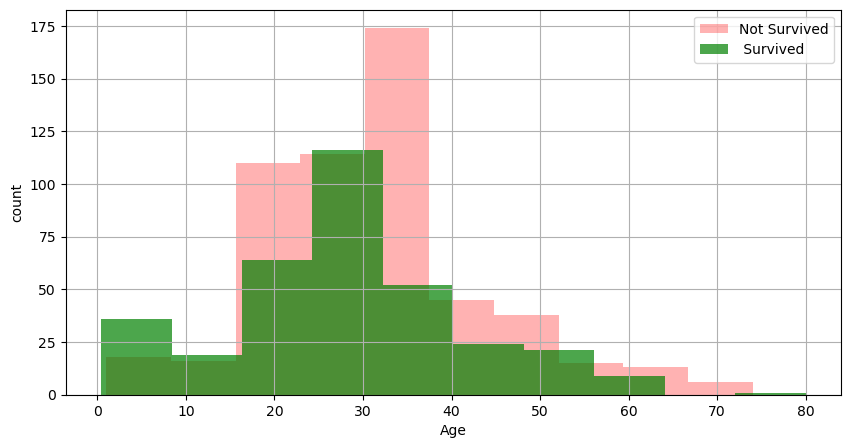

In [39]:
hist('Age')
plt.show()

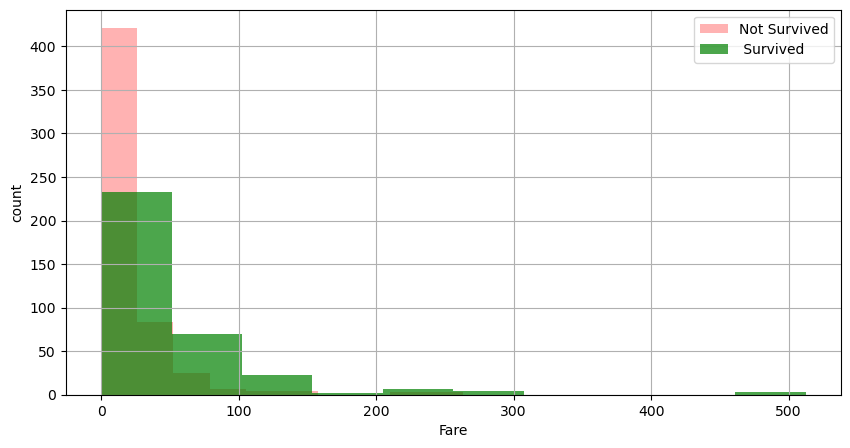

In [40]:
hist('Fare')
plt.show()

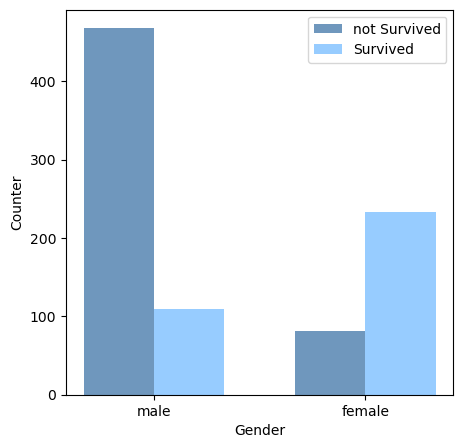

In [41]:
barWidth = 0.1
fig = plt.subplots(figsize =(5, 5))
Survived_ = [len(data[(data["Sex"]=="male") & (data["Survived"]==1)])
             ,len(data[(data["Sex"]=="female") & (data["Survived"]==1)])]
not_Survived = [len(data[(data["Sex"]=="male") & (data["Survived"]==0)]),
                len(data[(data["Sex"]=="female") & (data["Survived"]==0)])]

plt.bar([0.2,0.5] ,not_Survived, color ='#6F97BD', width = barWidth, label ='not Survived')
plt.bar([0.3,0.6] ,Survived_, color ='#97CCFF', width = barWidth, label ='Survived')

plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Counter', fontsize = 10)
plt.xticks([0.25,0.55],
        ['male', 'female'])

plt.legend()
plt.show()

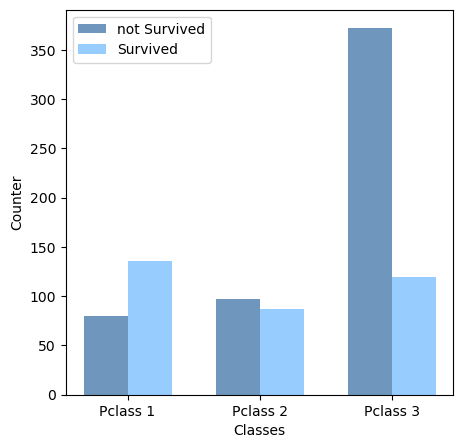

In [42]:
barWidth = 0.1
fig = plt.subplots(figsize =(5, 5))
Survived_ = [len(data[(data["Pclass"]==1) & (data["Survived"]==1)])
             ,len(data[(data["Pclass"]==2) & (data["Survived"]==1)])
            ,len(data[(data["Pclass"]==3) & (data["Survived"]==1)])]

not_Survived = [len(data[(data["Pclass"]==1) & (data["Survived"]==0)])
             ,len(data[(data["Pclass"]==2) & (data["Survived"]==0)])
            ,len(data[(data["Pclass"]==3) & (data["Survived"]==0)])]

plt.bar([0.2,0.5,0.8] ,not_Survived, color ='#6F97BD', width = barWidth, label ='not Survived')
plt.bar([0.3,0.6,0.9] ,Survived_, color ='#97CCFF', width = barWidth, label ='Survived')

plt.xlabel('Classes',fontsize = 10)
plt.ylabel('Counter', fontsize = 10)
plt.xticks([0.25,0.55,0.85],
        ['Pclass 1', 'Pclass 2','Pclass 3'])

plt.legend()
plt.show()

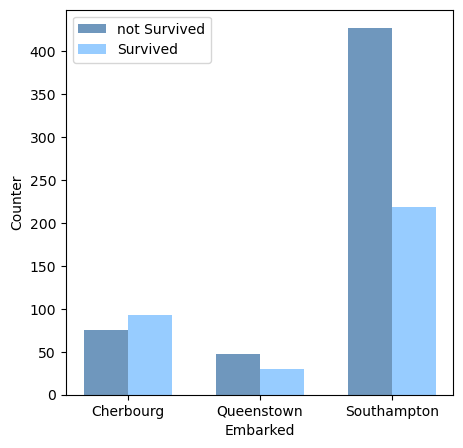

In [43]:
barWidth = 0.1
fig = plt.subplots(figsize =(5, 5))
Survived_ = [len(data[(data["Embarked"]=='C') & (data["Survived"]==1)])
             ,len(data[(data["Embarked"]=='Q') & (data["Survived"]==1)])
            ,len(data[(data["Embarked"]=='S') & (data["Survived"]==1)])]

not_Survived = [len(data[(data["Embarked"]=='C') & (data["Survived"]==0)])
             ,len(data[(data["Embarked"]=='Q') & (data["Survived"]==0)])
            ,len(data[(data["Embarked"]=='S') & (data["Survived"]==0)])]

plt.bar([0.2,0.5,0.8] ,not_Survived, color ='#6F97BD', width = barWidth, label ='not Survived')
plt.bar([0.3,0.6,0.9] ,Survived_, color ='#97CCFF', width = barWidth, label ='Survived')

plt.xlabel('Embarked',fontsize = 10)
plt.ylabel('Counter', fontsize = 10)
plt.xticks([0.25,0.55,0.85],
        ['Cherbourg', 'Queenstown','Southampton'])

plt.legend()
plt.show()

### **The observation**

* The number of Passengers who Survived and those not Survived between 25 old to 30 old are almost the same numbers. 
* The most Passengers between 30 old to 35 old are not survived.
* most Passengers they have less then 100 fare. 
* The number of female survivors is twice the number of male survivors, while the number of not survived male is four times the female who have not survived.
* number of Passengeres survived in (Pcalss 2) are close to the number of passengers not survived.Also, moust of passengers in (Pcalss 3).
* Must of passengerss embarked from (Southampton) and more then 400 passengerss in from (Southampton) not survived also half of this number survived that will be the almost 200 passengers.

## Analyze between multi features

In [44]:
data[["Age_Range",'Sex', "Survived"]].groupby(['Sex','Age_Range']).mean()

Survived
Sex    Age_Range                 
female (0.34, 16.336]    0.673469
       (16.336, 32.252]  0.716763
       (32.252, 48.168]  0.794118
       (48.168, 64.084]  0.916667
       (64.084, 80.0]         NaN
male   (0.34, 16.336]    0.431373
       (16.336, 32.252]  0.160000
       (32.252, 48.168]  0.183333
       (48.168, 64.084]  0.177778
       (64.084, 80.0]    0.090909

In [45]:
data[["Pclass",'Sex', "Survived"]].groupby(['Sex','Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [46]:
data[["Embarked",'Sex', "Survived"]].groupby(['Sex','Embarked']).mean()

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.692683
male   C         0.305263
       Q         0.073171
       S         0.174603

In [47]:
data[["Embarked",'Pclass', "Survived"]].groupby(['Pclass','Embarked']).mean()

Survived
Pclass Embarked          
1      C         0.694118
       Q         0.500000
       S         0.589147
2      C         0.529412
       Q         0.666667
       S         0.463415
3      C         0.378788
       Q         0.375000
       S         0.189802

In [48]:
data[["Embarked",'Age_Range', "Survived"]].groupby(['Embarked','Age_Range']).mean()

Survived
Embarked Age_Range                 
C        (0.34, 16.336]    0.789474
         (16.336, 32.252]  0.505155
         (32.252, 48.168]  0.566667
         (48.168, 64.084]  0.631579
         (64.084, 80.0]    0.000000
Q        (0.34, 16.336]    0.428571
         (16.336, 32.252]  0.419355
         (32.252, 48.168]  0.200000
         (48.168, 64.084]  0.000000
         (64.084, 80.0]    0.000000
S        (0.34, 16.336]    0.500000
         (16.336, 32.252]  0.288462
         (32.252, 48.168]  0.379085
         (48.168, 64.084]  0.367347
         (64.084, 80.0]    0.166667

In [49]:
data[["Age_Range",'Pclass', "Survived"]].groupby(['Pclass','Age_Range']).mean()

Survived
Pclass Age_Range                 
1      (0.34, 16.336]    0.888889
       (16.336, 32.252]  0.640449
       (32.252, 48.168]  0.681159
       (48.168, 64.084]  0.534884
       (64.084, 80.0]    0.166667
2      (0.34, 16.336]    0.904762
       (16.336, 32.252]  0.421053
       (32.252, 48.168]  0.448980
       (48.168, 64.084]  0.352941
       (64.084, 80.0]    0.000000
3      (0.34, 16.336]    0.400000
       (16.336, 32.252]  0.244838
       (32.252, 48.168]  0.100000
       (48.168, 64.084]  0.111111
       (64.084, 80.0]    0.000000

### **The observation**

* Females between the ages of (48, 64) rate is (0.91). this is the highist surviving rate in the age ranges. And this thing is unexpected where should the passengers between (0 , 16) have a higher chance than other passengers.
* Males aged (0, 16) have the lowest survival rate from any range for females survival rates. And the largest survival rate from any range for males survival rates.
* Females in Class (1, 2) have roughly the same survival rate. which are 0.96 for Class 1 and 0.92 for Class 2 where 0.5 for Class 3. And, The males in Class 2 have approximately (0.15) rate that is almost looking like Class 3 which is (0.13) rate. 
* Females embarked from Cherbourg have (0.87) survival rate which is the largest rate among all embarked.
* The females embarked from Queenstown have (0.75) survival and from Southampton have (0.68) survival that mean the female embarked from Queenstown have larger survival rate than Southampton. however, Male embarked from Queenstown have (0.073) survival rate and from Southampton have (0.17) survival rate that mean the male embarked from Queenstown have lower than survival rate than Southampton.
* class 1 Passengers and embarked from Queenstown have (0.5) survival rate when the class 2 Passengers and embarked from Queenstown have (0.66) survival rate.
* The ages of Passengers between (48, 64) and who embarked from Cherbourg have a larger survival rate than any ages group and who embarked from other Ports.
* Passengers between the ages of (0,16) in Class 2 have a (0.90) survival rate, which is larger than the (0.88) survival rate for Passengers in the same range of age but in Class 1.

## Visualizing data

In [50]:
def stripplot(x):
    sb.stripplot(x =x, y ='Age', data = data, hue ='Survived', dodge = True,palette=['#FF4343','#009CEB'],jitter =0.15)
    sb.violinplot(x =x, y ='Age', data = data, hue ='Survived',palette=['#FAA09B','#74BFEB'],jitter =0.15)
    plt.legend(title='Survived', loc='center left', labels=['Not_Survived', 'Survived'],bbox_to_anchor=(1, 0.5))    

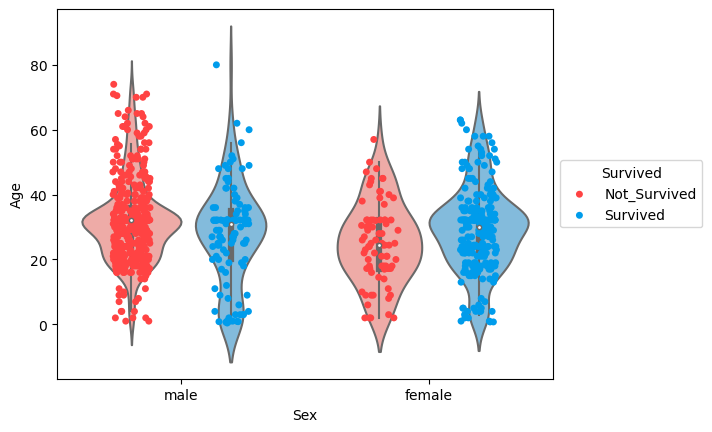

In [51]:
stripplot('Sex')

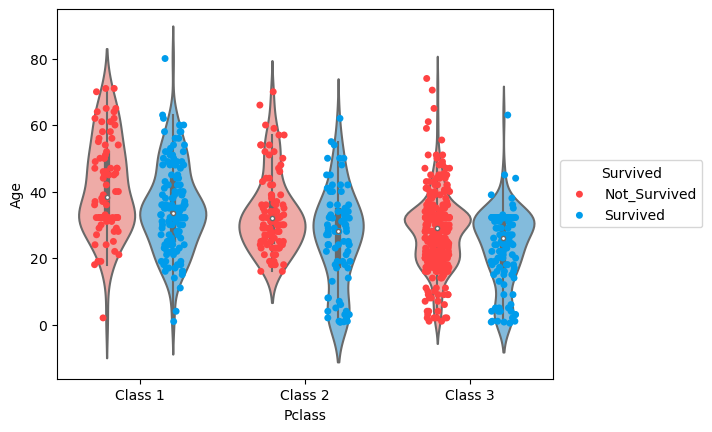

In [52]:
stripplot('Pclass')
plt.xticks([0,1,2],['Class 1', 'Class 2','Class 3'])
plt.show()

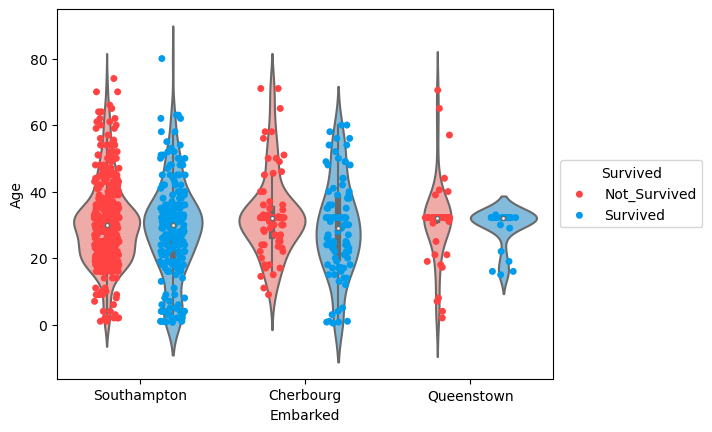

In [53]:
stripplot('Embarked')
plt.xticks([0,1,2],['Southampton', 'Cherbourg','Queenstown'])
plt.show()

In [54]:
def countplot(Num,condtion,x,xticks,title):
    fig, axes = plt.subplots(1, Num, figsize=(10, 5), sharey=True)
    fig.supxlabel(x)
    fig.supylabel('Count')
    for i in range(Num):
        sb.countplot(condtion[i], x=x, hue='Survived', palette=['#FF4343','#009CEB']
             ,ax = axes[i])
        axes[i].legend([], [], frameon=False)
        axes[i].set(ylabel=None,xlabel=None)
        fig.legend(title='Survived', loc='center left', 
                   labels=['Not_Survived', 'Survived'],bbox_to_anchor=(1, 0.5))
        axes[i].set_xticks([0,1,2],xticks)    
        axes[i].set_title(title[i])

In [55]:
male=data[data['Sex']=='male']
female = data[data['Sex']=='female']
Sex = [female,male]

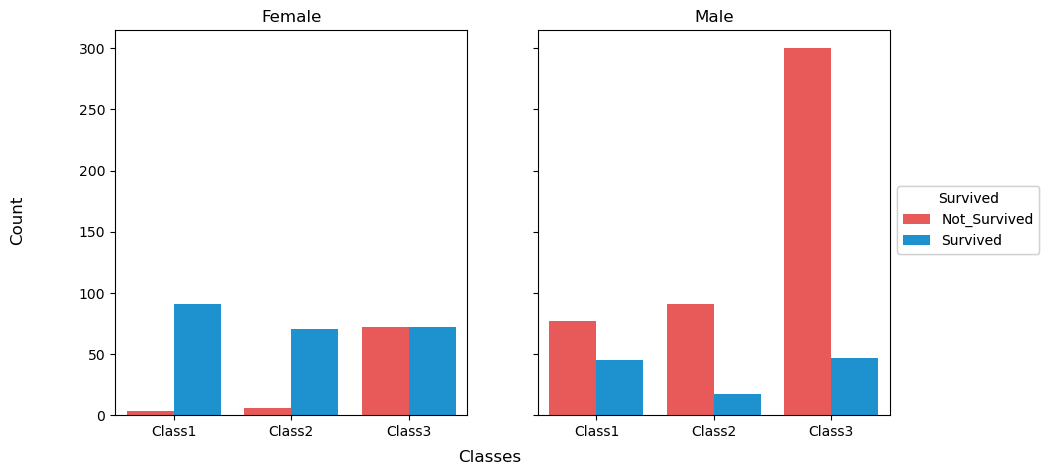

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.supylabel('Count')
fig.supxlabel("Classes")
m_f = ['Female','Male']
for i in range(2):
    sb.countplot(Sex[i], x='Pclass', hue='Survived', palette=['#FF4343','#009CEB']
                ,ax = axes[i])
    axes[i].legend([], [], frameon=False)
    axes[i].set(ylabel=None,xlabel=None)
    fig.legend(title='Survived', loc='center left', 
                labels=['Not_Survived', 'Survived'],bbox_to_anchor=(0.9, 0.5))   
    axes[i].set_title(m_f[i])
    axes[i].set_xticks([0,1,2],['Class1','Class2','Class3'])
plt.show()

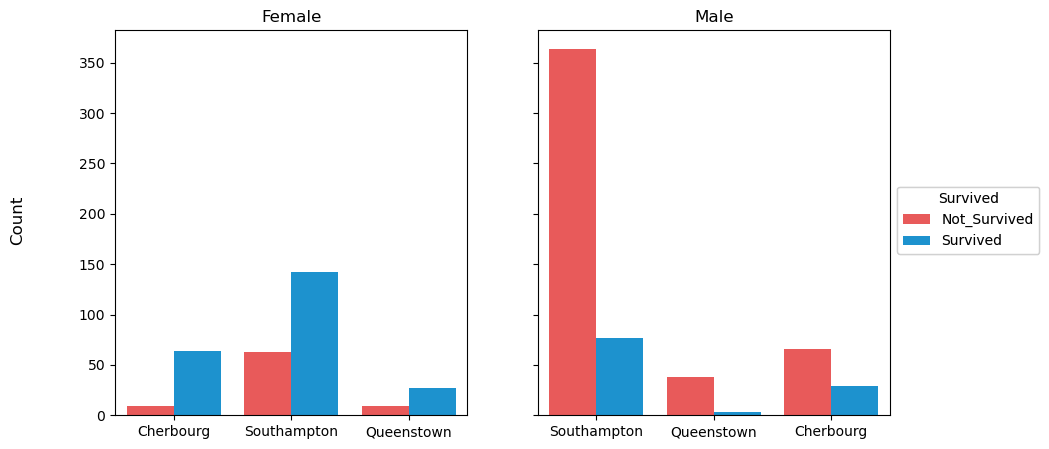

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.supylabel('Count')
Sex = [female,male]
for i in range(2):
    sb.countplot(Sex[i], x='Embarked', hue='Survived', palette=['#FF4343','#009CEB']
                ,ax = axes[i])
    axes[i].legend([], [], frameon=False)
    axes[i].set(ylabel=None,xlabel=None)
    fig.legend(title='Survived', loc='center left', 
                labels=['Not_Survived', 'Survived'],bbox_to_anchor=(0.9, 0.5))   
    axes[i].set_title(m_f[i])
axes[0].set_xticks([0,1,2],[ 'Cherbourg','Southampton','Queenstown'])
axes[1].set_xticks([0,1,2],[ 'Southampton','Queenstown','Cherbourg'])
plt.show()

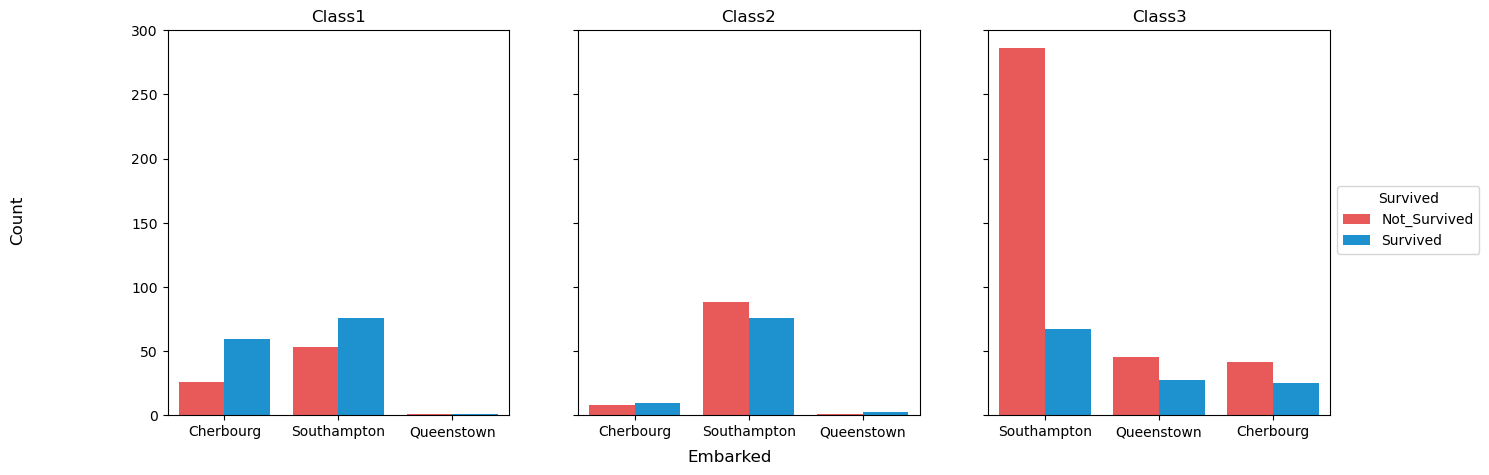

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fig.supylabel('Count')
fig.supxlabel("Embarked")
class1=data[data['Pclass']==1]
class2=data[data['Pclass']==2]
class3=data[data['Pclass']==3]
Classes = [class1,class2,class3]
classes_n = ['Class1','Class2','Class3']

for i in range(3):
    sb.countplot(Classes[i], x='Embarked', hue='Survived', palette=['#FF4343','#009CEB']
                ,ax = axes[i])
    axes[i].legend([], [], frameon=False)
    axes[i].set(ylabel=None,xlabel=None)
    axes[i].set_title(classes_n[i])
fig.legend(title='Survived', loc='center left', 
            labels=['Not_Survived', 'Survived'],bbox_to_anchor=(0.9, 0.5))      
    
axes[0].set_xticks([0,1,2],[ 'Cherbourg','Southampton','Queenstown'])
axes[1].set_xticks([0,1,2],[ 'Cherbourg','Southampton','Queenstown'])
axes[2].set_xticks([0,1,2],[ 'Southampton','Queenstown','Cherbourg'])
plt.show()

### **The observation**

* The range of mean age of men who survived between (20 and 40) years.
* The must of a male whose not survived them age between ( 20 and 40 ) years the same as who survived.
* In class 2 there is not anyone who has not survived and his age is under 15 years old.
* The mean of passengers age whose not survived class 1 is almost 40 years. And, the passengers who survived class 1 are approx 30 years. 
* The mean of passengers age who survived and not survived class 3 is 30 years.
* The number of females who survived in classes 2 and 3 is approx 75 passengers whereas in class 1 is approx 90.
* The number of females whose not survived in classes 1 and 2 is far fewer passengers survived whereas in class 3 the same number of passengers survived.
* for the male the number of passengers whose not survived class 2 is the same as the number of the female who survived in class 2.
* The number of male passengers whose not survived class 3 is 300 passengers and this is the biggest number at the chart.
* The number of male passengers who embarked from Southampton and not survived is more than 350 passengers whereas the passengers who survived are less than 100 passengers.
* The number of female passengers who embarked from Southampton and survived is almost 150 passengers and half of this number are not survived.

##  Wrangle data for machine learning

Here we will select features that we analyzed above and have collected several assumptions from them. Also, we have cleaned some of the columns and dropped some of them. However, we need to make cleaning again to have the data ready for a machine-learning algorithm.


####   Correcting and Collecting the features

In [59]:
Tran_data = Traning_data.drop(['Ticket','Name', 'PassengerId'],axis = 1)
Test_data = Testing_data.drop(['Ticket','Name'],axis = 1)

* Drop the columns( Ticket, Name, and PassengerId ) from the Training data.
* Drop the column Ticket from Testing dataset.

**Converting features into numerical features**

convert features that contain categories into numerical values which most models required that. 

In [60]:
Tran_data['Sex'] = Tran_data['Sex'].map({'female':1,'male':0}).astype(int)
Test_data['Sex'] = Test_data['Sex'].map({'female':1,'male':0}).astype(int)

here we convert the Sex from (female and male) into (1,0) where female=1 and male=0.

In [61]:
Tran_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [62]:
Tran_data["Age_Range"]= pd.cut(Tran_data['Age'], 5)
Test_data["Age_Range"]= pd.cut(Tran_data['Age'], 5)

In [63]:
Tran_data["Age_Range"].value_counts()

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age_Range, dtype: int64

In [64]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    object  
 8   Age_Range    418 non-null    category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 26.9+ KB


In [65]:
All_Data = [Tran_data,Test_data]

In [66]:
for dataset in All_Data:
        dataset['Age']= pd.cut(dataset['Age'], 5,labels=[0,1,2,3,4]).astype(int)

In [67]:
Tran_data.drop(['Age_Range'],axis = 1,inplace = True)
Test_data.drop(['Age_Range'],axis = 1,inplace = True)

In [68]:
Tran_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


In [69]:
Test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2,0,0,7.8292,Q
1,893,3,1,3,1,0,7.0000,S
2,894,2,0,4,0,0,9.6875,Q
3,895,3,0,1,0,0,8.6625,S
4,896,3,1,1,1,1,12.2875,S


Here we convert the Age from numbers into categories by adding Age_Range column then classify the Age into 5 categories.
* [0,16.336] = 0
* [16.336,32.252] = 1
* [32.252, 48.168]   = 2
* [48.168, 64.084] = 3
* [64.084< ]   = 4

In [70]:
Tran_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
Tran_data['Embarked'] = Tran_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
Test_data['Embarked'] = Test_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [72]:
Tran_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,0
1,1,1,1,2,1,0,71.2833,1
2,1,3,1,1,0,0,7.9250,0
3,1,1,1,2,1,0,53.1000,0
4,0,3,0,2,0,0,8.0500,0


here we convert the Embarked from (S, C and Q) into (0,1,2) where 
* Southampton =0  
* Cherbourg =1 
* Queenstown = 2

In [73]:
pd.qcut(Tran_data['Fare'], 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare, dtype: int64

In [74]:
for dataset in All_Data:
    dataset['Fare']=pd.qcut(dataset['Fare'], 4,labels=[0,1,2,3]).astype(int)

In [75]:
Tran_data['Fare'].value_counts()

1    224
0    223
3    222
2    222
Name: Fare, dtype: int64

In [76]:
Tran_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


Here we convert the Age from numbers into categories by adding Age_Range column then classify the Age into 5 categories.
* less than 7.896 = 0
* [7.896, 14.454] = 1
* [14.454, 31.0]   = 2
* more than 31.0    = 3

In [77]:
Tran_data['FamilySize'] = Tran_data['SibSp']+Tran_data['Parch']
Test_data['FamilySize'] = Test_data['SibSp']+Test_data['Parch']

In [78]:
Tran_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,1,1,0,0,0,1
1,1,1,1,2,1,0,3,1,1
2,1,3,1,1,0,0,1,0,0
3,1,1,1,2,1,0,3,0,1
4,0,3,0,2,0,0,1,0,0


In [79]:
Tran_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


Here we can see when the number of people in the family is 3 then the mean  of survival comes approx 0.7.

In [80]:
for dataset in All_Data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 0, 'IsAlone'] = 1

In [81]:
Tran_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [82]:
Tran_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1,0
1,1,1,1,2,1,0,3,1,1,0
2,1,3,1,1,0,0,1,0,0,1
3,1,1,1,2,1,0,3,0,1,0
4,0,3,0,2,0,0,1,0,0,1


In [83]:
for dataset in All_Data:
    dataset.drop(['SibSp','Parch','FamilySize'],axis = 1 ,inplace =True)

In [84]:
Tran_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1,0,0,0
1,1,1,1,2,3,1,0
2,1,3,1,1,1,0,1
3,1,1,1,2,3,0,0
4,0,3,0,2,1,0,1


In [85]:
Tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   Fare      891 non-null    int64
 5   Embarked  891 non-null    int64
 6   IsAlone   891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


In [86]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   Fare         418 non-null    int64
 5   Embarked     418 non-null    int64
 6   IsAlone      418 non-null    int64
dtypes: int64(7)
memory usage: 23.0 KB


Now the data is redy to use it in the machine learning algorithm. we will use DecisionTreeClassifier Algorithm.

In [87]:
x_traning = Tran_data[['Pclass','Sex','Age','Fare','Embarked','IsAlone']]

In [88]:
y_traning = Tran_data['Survived']

In [89]:
X_test  = Test_data.drop("PassengerId", axis=1).copy()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree



model = tree.DecisionTreeClassifier(max_depth=10)
model.fit(x_traning, y_traning)
y_pred = model.predict(X_test)

validation = round(model.score(x_traning,y_traning) * 100, 2)
print("Validation model: ",validation)

output = pd.DataFrame({'PassengerId': Test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Validation model:  86.08
Your submission was successfully saved!
